### <b> <u> Pima Indians Diabetes Database </u> <b>

<u> Context </u> <br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

<b> <u> Content </u> </b> <br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Pipelines In SkLearn

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
diabetes = pd.read_csv("C:/Users/HP/Desktop/Upgrad Case Study/Pima_Diabetes/diabetes.csv")
diabetes.head(4)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0

In [5]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Rescaling the Features

We will use MinMax scaling.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

diabetes[num_vars] = scaler.fit_transform(diabetes[num_vars])

diabetes.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0

### Checking For `Any Null Values`

In [11]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Checking for Outliers

In [13]:
# Checking for outliers in the continuous variables
num_diabetes = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [14]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_diabetes.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.607510       0.566438       0.207439    0.094326   
std       0.198210    0.160666       0.158654       0.161134    0.136222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.497487       0.508197       0.000000    0.000000   
50%       0.176471    0.587940       0.590164       0.232323    0.036052   
75%       0.352941    0.704774       0.655738       0.323232    0.150414   
90%       0.529412    0.839196       0.721311       0.404040    0.248227   
95%       0.588235    0.909548       0.737705       0.444444    0.346336   
99%       0.764706    0.984925       0.868852       0.518485    0.614539   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.476790                  0.168179    0.204015    0.348958  
std      0.117499                  0.141473    0.196004    0.476951  
min      0.000000                  0.000000    0.000000    0.000000  
25%      0.406855                  0.070773    0.050000    0.000000  
50%      0.476900                  0.125747    0.133333    0.000000  
75%      0.545455                  0.234095    0.333333    1.000000  
90%      0.618480                  0.341845    0.500000    1.000000  
95%      0.661624                  0.450406    0.616667    1.000000  
99%      0.756468                  0.691857    0.766667    1.000000  
max      1.000000                  1.000000    1.000000    1.000000

In [15]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                 0.294118
Glucose                     0.207286
BloodPressure               0.147541
SkinThickness               0.323232
Insulin                     0.150414
BMI                         0.138599
DiabetesPedigreeFunction    0.163322
Age                         0.283333
Outcome                     1.000000
dtype: float64


### Quantile-based Flooring and Capping

In [16]:
print(diabetes.quantile(0.05))
print(diabetes.quantile(0.95))

Pregnancies                 0.000000
Glucose                     0.396985
BloodPressure               0.317213
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.324888
DiabetesPedigreeFunction    0.026623
Age                         0.000000
Outcome                     0.000000
Name: 0.05, dtype: float64
Pregnancies                 0.588235
Glucose                     0.909548
BloodPressure               0.737705
SkinThickness               0.444444
Insulin                     0.346336
BMI                         0.661624
DiabetesPedigreeFunction    0.450406
Age                         0.616667
Outcome                     1.000000
Name: 0.95, dtype: float64


In [17]:
diabetes = diabetes[~((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]
print(diabetes.shape)

(639, 9)


 - Here, No missing value imputation is required.

### Test-Train Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
diabetes.head(3)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535      0.0  0.500745   
1     0.058824  0.427136       0.540984       0.292929      0.0  0.396423   
2     0.470588  0.919598       0.524590       0.000000      0.0  0.347243   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0

In [20]:
# Putting feature variable to X
X = diabetes.drop(['Outcome'], axis=1)
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
5     0.294118  0.582915       0.606557       0.000000  0.000000  0.381520   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
5                  0.052519  0.150000

In [21]:
# Putting response variable to y
y = diabetes['Outcome']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
5    0.0
Name: Outcome, dtype: float64

##### Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_)

[0.11397333 0.23923474 0.10085128 0.07752089 0.07637722 0.13637882
 0.11691217 0.13875156]


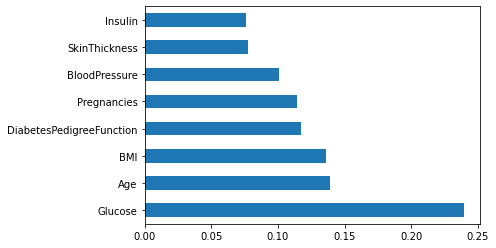

In [24]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation

In [25]:
diabetes.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.142093       0.210666      -0.094425   
Glucose                      0.142093  1.000000       0.238754      -0.004609   
BloodPressure                0.210666  0.238754       1.000000       0.037388   
SkinThickness               -0.094425 -0.004609       0.037388       1.000000   
Insulin                     -0.114510  0.248225      -0.041513       0.487566   
BMI                          0.036958  0.192504       0.303301       0.390340   
DiabetesPedigreeFunction     0.009289  0.066530       0.024290       0.148486   
Age                          0.567438  0.286682       0.354036      -0.143376   
Outcome                      0.227987  0.492740       0.183298       0.030676   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.114510  0.036958                  0.009289   
Glucose                   0.248225  0.192504                  0.066530   
BloodPressure            -0.041513  0.303301                  0.024290   
SkinThickness             0.487566  0.390340                  0.148486   
Insulin                   1.000000  0.188635                  0.213191   
BMI                       0.188635  1.000000                  0.144757   
DiabetesPedigreeFunction  0.213191  0.144757                  1.000000   
Age                      -0.089535  0.063370                  0.030081   
Outcome                   0.097746  0.269371                  0.179072   

                               Age   Outcome  
Pregnancies               0.567438  0.227987  
Glucose                   0.286682  0.492740  
BloodPressure             0.354036  0.183298  
SkinThickness            -0.143376  0.030676  
Insulin                  -0.089535  0.097746  
BMI                       0.063370  0.269371  
DiabetesPedigreeFunction  0.030081  0.179072  
Age                       1.000000  0.263344  
Outcome                   0.263344  1.000000

<AxesSubplot:>

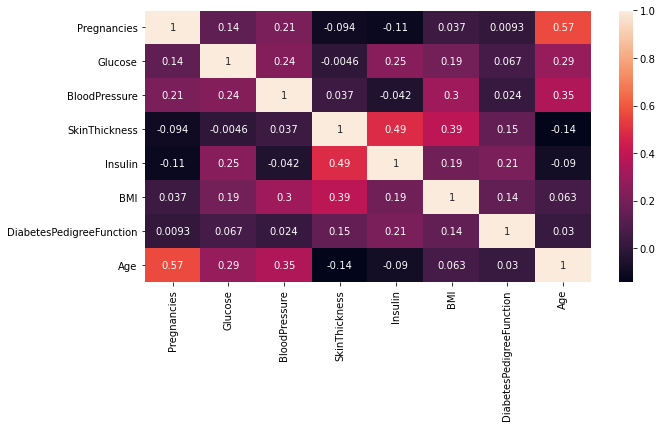

In [26]:
import seaborn as sns
corr=diabetes.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(10,5))
sns.heatmap(diabetes[top_features].corr(),annot=True)


In [27]:
#### Remove The correlated

In [28]:
threshold=0.5

In [29]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
correlation(diabetes.iloc[:,:-1],threshold)

{'Age'}

#### Information Gain

In [31]:
from sklearn.feature_selection import mutual_info_classif

In [32]:
mutual_info=mutual_info_classif(X,y)

In [33]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)


Glucose                     0.121437
BMI                         0.064801
Age                         0.031475
Insulin                     0.025175
SkinThickness               0.013931
Pregnancies                 0.012261
BloodPressure               0.003438
DiabetesPedigreeFunction    0.000000
dtype: float64

### Dropping the column with `High Correlation`

In [34]:
X = X.drop(['Age'], axis=1)

### Further Running the `ExtraTreeClassifier Algorithm` to check the Feature Importance 

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [36]:
print(model.feature_importances_)

[0.13410459 0.26350954 0.11943762 0.09076764 0.08481704 0.16314734
 0.14421624]


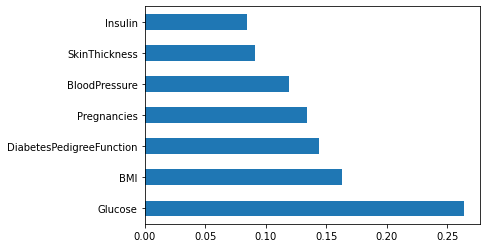

In [37]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Let's Consider the `Top 5 Features `

In [38]:
X = X.drop(['Insulin'], axis=1)

In [39]:
X = X.drop(['SkinThickness'], axis=1)

In [40]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [41]:
y.value_counts()

0.0    439
1.0    200
Name: Outcome, dtype: int64

In [42]:
# columnslitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(447, 5)
(192, 5)
(447,)
(192,)


### Pipeline Creation

In [44]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [45]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [46]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [47]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=5)),
                     ('rf_classifier',RandomForestClassifier())])

In [48]:
pipeline_xgbclassifier=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=5)),
                     ('rf_classifier',XGBClassifier())])

In [49]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_xgbclassifier]

In [50]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [51]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'XGBClassifier'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

[15:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.7916666666666666
Decision Tree Test Accuracy: 0.671875
RandomForest Test Accuracy: 0.7604166666666666
XGBClassifier Test Accuracy: 0.7239583333333334


In [53]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
prediction=dt_classifier.predict(X_test)

In [55]:
y_test.value_counts()

0.0    129
1.0     63
Name: Outcome, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[101  28]
 [ 39  24]]
0.6510416666666666
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       129
         1.0       0.46      0.38      0.42        63

    accuracy                           0.65       192
   macro avg       0.59      0.58      0.58       192
weighted avg       0.64      0.65      0.64       192



In [57]:
### Hyper Parameter Tuning

In [58]:
### Manual Hyperparameter Tuning

model=LogisticRegression(penalty='l2',solver='lbfgs',max_iter=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[127   2]
 [ 42  21]]
0.7708333333333334
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85       129
         1.0       0.91      0.33      0.49        63

    accuracy                           0.77       192
   macro avg       0.83      0.66      0.67       192
weighted avg       0.80      0.77      0.73       192



##### Randomized Search Cv

In [59]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
penalty = ['l1', 'l2', 'elasticnet', 'none']
# Maximum number of levels in tree
C=np.logspace(-4, 4, 20)
# Minimum number of samples required to split a node
solver=['lbfgs','newton-cg','liblinear','sag','saga']
# Minimum number of samples required at each leaf node
max_iter=[100, 1000,2500, 5000]
# Create the random grid
random_grid = {'penalty': penalty,
               'C': C,
               'solver': solver,
               'max_iter': max_iter}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}


In [60]:
rf=LogisticRegression()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [61]:
rf_randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 10000.0}

In [62]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [63]:
best_random_grid=rf_randomcv.best_estimator_

In [64]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[123   6]
 [ 35  28]]
Accuracy Score 0.7864583333333334
Classification report:               precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       129
         1.0       0.82      0.44      0.58        63

    accuracy                           0.79       192
   macro avg       0.80      0.70      0.72       192
weighted avg       0.79      0.79      0.77       192



#### GridSearch CV

In [65]:
rf_randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 10000.0}

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': [rf_randomcv.best_params_['solver']],
    'penalty': [rf_randomcv.best_params_['penalty']],
    'max_iter': [rf_randomcv.best_params_['max_iter'], 
                         rf_randomcv.best_params_['max_iter']+200, 
                         rf_randomcv.best_params_['max_iter'] + 400],
    'C': [rf_randomcv.best_params_['C'] - 0.2,
                          rf_randomcv.best_params_['C'] - 0.1,
                          rf_randomcv.best_params_['C'], 
                          rf_randomcv.best_params_['C'] + 0.1,
                          rf_randomcv.best_params_['C'] + 0.2]
}

print(param_grid)

{'solver': ['saga'], 'penalty': ['l1'], 'max_iter': [1000, 1200, 1400], 'C': [9999.8, 9999.9, 10000.0, 10000.1, 10000.2]}


In [67]:
#### Fit the grid_search to the data
dt=LogisticRegression()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [9999.8, 9999.9, 10000.0, 10000.1, 10000.2],
                         'max_iter': [1000, 1200, 1400], 'penalty': ['l1'],
                         'solver': ['saga']},
             verbose=2)

In [68]:
grid_search.best_estimator_

LogisticRegression(C=9999.8, max_iter=1000, penalty='l1', solver='saga')

In [69]:
best_grid=grid_search.best_estimator_

In [70]:
best_grid

LogisticRegression(C=9999.8, max_iter=1000, penalty='l1', solver='saga')

In [71]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[123   6]
 [ 35  28]]
Accuracy Score 0.7864583333333334
Classification report:               precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       129
         1.0       0.82      0.44      0.58        63

    accuracy                           0.79       192
   macro avg       0.80      0.70      0.72       192
weighted avg       0.79      0.79      0.77       192



### Automated Hyperparameter Tuning
Automated Hyperparameter Tuning can be done by using techniques such as 
- Bayesian Optimization
- Gradient Descent
- Evolutionary Algorithms

#### Bayesian Optimization
Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time.
In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

- Objective Function = defines the loss function to minimize.
- Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
- Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [72]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [91]:
space = {'penalty': hp.choice('penalty', ['l1', 'l2', 'elasticnet', 'none']),
        'solver': hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag','saga']),
        "C": hp.loguniform("C", np.log(0.001), np.log(0.2)),
    }

In [92]:
space

{'penalty': <hyperopt.pyll.base.Apply at 0x20c1b4862b0>,
 'solver': <hyperopt.pyll.base.Apply at 0x20c1b486460>,
 'C': <hyperopt.pyll.base.Apply at 0x20c1b4869a0>}

In [93]:

def objective(space):
    model = LogisticRegression(penalty = space['penalty'],
                                 solver = space['solver'],
                                 C = space['C']
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [94]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|██████████| 80/80 [00:02<00:00, 34.40trial/s, best loss: -0.78729088639201]  


{'C': 0.009963791471050977, 'penalty': 3, 'solver': 0}

In [96]:
crit = {0: 'l1', 1: 'l2', 2: 'elasticnet', 3: 'none'}
feat = {0: 'lbfgs', 1: 'newton-cg', 2: 'liblinear', 3: 'sag', 4:'saga'}


print(crit[best['penalty']])
print(feat[best['solver']])

none
lbfgs


In [97]:
best['C']

0.009963791471050977

In [101]:
trainedlogistic = LogisticRegression(penalty = crit[best['penalty']],solver = feat[best['solver']], C = best['C']).fit(X_train,y_train)
predictionlogistic = trainedlogistic.predict(X_test)
print(confusion_matrix(y_test,predictionlogistic))
print(accuracy_score(y_test,predictionlogistic))
print(classification_report(y_test,predictionlogistic))
acc5 = accuracy_score(y_test,predictionlogistic)

[[123   6]
 [ 35  28]]
0.7864583333333334
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       129
         1.0       0.82      0.44      0.58        63

    accuracy                           0.79       192
   macro avg       0.80      0.70      0.72       192
weighted avg       0.79      0.79      0.77       192



In [108]:
predictionlogistic[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(predictionlogistic)

In [110]:
# Let's see the head
y_pred_1.head()

0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0

In [111]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [112]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

Outcome   ID    0
0      0.0  183  0.0
1      0.0  481  0.0
2      1.0   93  0.0
3      1.0  510  0.0
4      0.0  311  0.0

In [116]:
y_pred_final = y_pred_final.rename(columns={0:"Diabetes_Probability"})

In [117]:
y_pred_final.head(4)

Outcome   ID  Diabetes_Probability
0      0.0  183                   0.0
1      0.0  481                   0.0
2      1.0   93                   0.0
3      1.0  510                   0.0

In [118]:
y_pred_final.Diabetes_Probability.value_counts()

0.0    158
1.0     34
Name: Diabetes_Probability, dtype: int64